In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon

In [2]:
use_raw_data=False
# Define selected countries
selected_country_names = ['US', 'CA', 'DE', 'BR', 'AU', 'JP']
country_full_names = ['United States', 'Canada', 'Germany', 'Brazil', 'Australia', 'Japan']
if use_raw_data:
    # Load the dataset
    file_path = '../../Dataset/Cloudflare-dataset/400w_ip_country_city_250713.csv'
    data = pd.read_csv(file_path)
    # Rename columns for clarity
    data.columns = ['IP', 'Prefix', 'Domain', 'Country', 'Region', 'City']
    key_wanted=['Country']
    # Filter data for the selected countries
    filtered_data = data[data['Country'].isin(selected_country_names)]
    filtered_data=filtered_data[key_wanted]
    filtered_data.to_csv("data/filtered_data.csv")
else:
    filtered_data=pd.read_csv("data/filtered_data.csv")
city_demand = filtered_data['Country'].value_counts() # Count the number of IPs per country    
# Normalize by total demand
city_demand = city_demand / 34245.32

# Print normalized demand per selected country
print(city_demand)

Country
US    50.289295
CA    11.723091
BR    11.233973
AU     8.167131
DE     1.883615
JP     0.217811
Name: count, dtype: float64


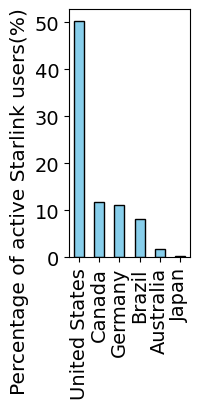

In [3]:
plt.figure(figsize=(2.1, 4.2))
city_demand.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('', fontsize=1)
plt.ylabel('Percentage of active Starlink users(%)                     ', fontsize=14.5)
ticks = plt.gca().get_xticks()
labels = country_full_names
plt.xticks(ticks, labels, fontsize=14)

plt.yticks(fontsize=14)
plt.tight_layout()

plt.savefig('figure3a.pdf',bbox_inches="tight")
plt.savefig('figure3a.png',bbox_inches="tight") 